In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload

%autoreload 2

In [2]:
def imshow(image: np.array, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.show()

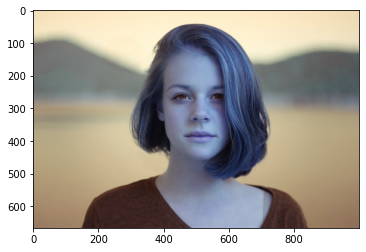

In [65]:
from models.image import Image

# load the image
image = Image(path='../data/images/test.jpg')
image.load()
imshow(image.img)


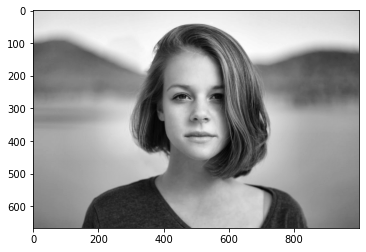

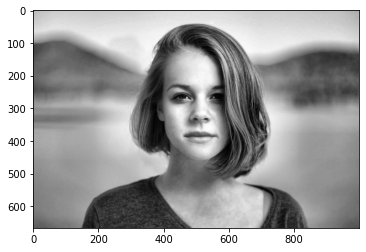

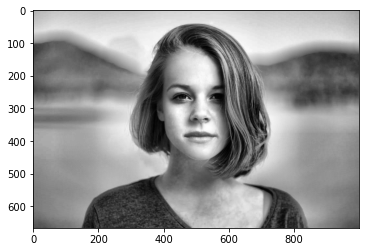

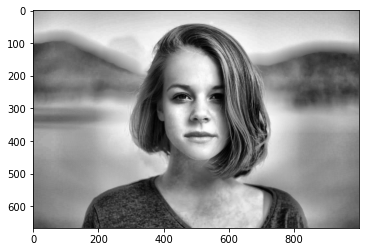

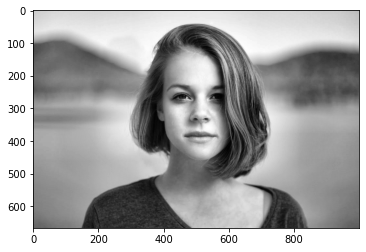

In [72]:
# import your func
# from modules.thresholding import threshHandler
from modules.histogramManipulation import histogramManipulationHandler
from modules.sharpening import sharpenHandler 

# imshow(threshHandler(image, {'threshold_value': 150}).img, cmap='gray')
imshow(histogramManipulationHandler(image, {'contrast_limit': 1}).img, cmap='gray')
# imshow(sharpenHandler(image, {'kernel_size': 7, 'strength': 0}).img, cmap='gray')